In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pyextremes import *
from tqdm import tqdm
from seaborn import axes_style
from scipy.stats import rv_continuous
import scipy

# relative import
from EVT_approach import read_df

# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
class ConditionalTailDist(rv_continuous):
    def __init__(self, x_hat, **kwargs):
        super().__init__(a=x_hat, name=f'conditional_tail_dist_{x_hat}', **kwargs)
        self.x_hat = x_hat

    def _pdf(self, x, alpha, beta):
        """PDF for x >= x_hat."""
        x_hat = self.x_hat
        norm_const = np.exp(alpha * x_hat ** beta)
        return alpha * beta * x ** (beta - 1) * np.exp(-alpha * x ** beta) * norm_const

    def _logpdf(self, x, alpha, beta):
        x_hat = self.x_hat
        return (np.log(alpha) + np.log(beta) + (beta - 1) * np.log(x)
                - alpha * x ** beta + alpha * x_hat ** beta)

    def _sf(self, x, alpha, beta):
        """Survival function: P(X >= x | X >= x_hat)."""
        x_hat = self.x_hat
        return np.exp(-alpha * x ** beta + alpha * x_hat ** beta)

    def _logsf(self, x, alpha, beta):
        x_hat = self.x_hat
        return -alpha * x ** beta + alpha * x_hat ** beta


In [3]:
# define series
grid_name = 'nordic'
season = 'spring'
df = read_df(grid_name, season)
series = df['Value']


In [4]:
model = EVA(series)

In [14]:
model.get_extremes("POT", threshold=50.10, r="1s")
# model.get_extremes("BM", block_size="1D")

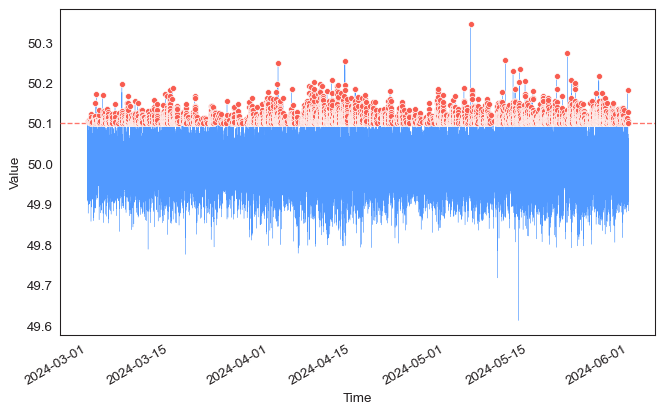

In [15]:
model.plot_extremes()
plt.show()

In [31]:
# # some base settings
# thresholds = np.linspace(50.1, 50.25, 100)
# conditional_tail_dist_list = [ConditionalTailDist(x_hat=thresholds[i]) for i in range(len(thresholds[:1]))]
# distributions = ["genpareto","expon"] + conditional_tail_dist_list
# print(distributions)
# for distribution in distributions:
#     # Get distribution name
#         if isinstance(distribution, str):
#             distribution_name = distribution
#             print(distribution_name)
#         elif isinstance(distribution, scipy.stats.rv_continuous):
#             distribution_name = getattr(distribution, "name", None)
#             print(distribution_name)
#         else:
#             raise TypeError(
#                 f"invalid type in {type(distribution)} "
#                 f"for the 'distribution' argument, "
#                 f"must be string or scipy.stats.rv_continuous"
#             )

['genpareto', 'expon', <__main__.ConditionalTailDist object at 0x1306c0710>]
genpareto
expon
conditional_tail_dist_50.1


In [40]:
from my_distributions import ConditionalTailDist
thresholds = np.linspace(50.1, 50.25, 100)
conditional_tail_dist_list = [ConditionalTailDist(x_hat=thresholds[i]) for i in range(len(thresholds[:1]))]
distributions = ["genpareto","expon"] + conditional_tail_dist_list
print(distributions)
for distribution in distributions:
    # Get distribution name
        if isinstance(distribution, str):
            distribution_name = distribution
            print(distribution_name)
        elif isinstance(distribution, scipy.stats.rv_continuous):
            distribution_name = getattr(distribution, "name", None)
            print(distribution_name)
        else:
            raise TypeError(
                f"invalid type in {type(distribution)} "
                f"for the 'distribution' argument, "
                f"must be string or scipy.stats.rv_continuous"
            )

['genpareto', 'expon', <my_distributions.ConditionalTailDist object at 0x129722d90>]
genpareto
expon
conditional_tail_dist_50.1


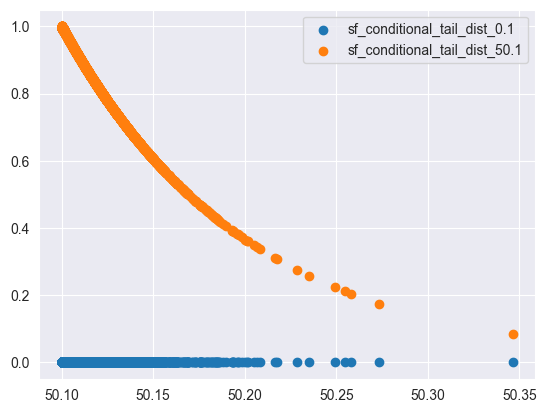

In [39]:
distributions = [ConditionalTailDist(x_hat=x_hat) for x_hat in [0.1, 50.1]]
extremes = model.extremes
for distribution in distributions:
    pdf = distribution._pdf(extremes, alpha=0.1, beta=2)
    sf = distribution._sf(extremes, alpha=0.1, beta=2)
    # plt.scatter(extremes, pdf, label='pdf_' + distribution.name)
    plt.scatter(extremes, sf, label='sf_' + distribution.name)
plt.legend()
plt.show()

In [45]:
# Visualizations

ax_mean_res = plt.figure().gca()
plot_mean_residual_life(ts=series, thresholds=thresholds, extremes_type='high', ax=ax_mean_res)
seconds_in_series = len(series)
ax_full = plot_threshold_stability(
    series,
    return_period=seconds_in_series,
    return_period_size='1s',
    thresholds=thresholds,
    distributions=distributions,
)
plt.show()

/Users/hendrik/Documents/TUe/Master/IAM/year 2/research topic/NEW/grid-frequency-tail-estimation/venv/lib/python3.11/site-packages/pyextremes/eva.py:1028: RuntimeWarning: 'conditional_tail_dist_50.1' distribution is not recommended to be used with extremes extracted using the 'POT' method, 'genpareto' or 'expon' should be used per the Pickands–Balkema–de Haan theorem
  warnings.warn(
/Users/hendrik/Documents/TUe/Master/IAM/year 2/research topic/NEW/grid-frequency-tail-estimation/venv/lib/python3.11/site-packages/pyextremes/eva.py:1028: RuntimeWarning: 'conditional_tail_dist_50.1' distribution is not recommended to be used with extremes extracted using the 'POT' method, 'genpareto' or 'expon' should be used per the Pickands–Balkema–de Haan theorem
  warnings.warn(
/Users/hendrik/Documents/TUe/Master/IAM/year 2/research topic/NEW/grid-frequency-tail-estimation/venv/lib/python3.11/site-packages/pyextremes/eva.py:1028: RuntimeWarning: 'conditional_tail_dist_50.1' distribution is not recomm

ValueError: The function value at x=501.0 is NaN; solver cannot continue.

In [8]:
extremes = get_extremes(
    ts=series,
    method="POT",
    threshold=50.18,
    r="1s"
)

# return_periods = get_return_periods(
#     ts=series,
#     extremes=extremes,
#     extremes_method="POT",
#     extremes_type="high",
#     # block_size="365.2425D",
#     return_period_size="1D",
#     plotting_position="weibull",
# )
#
# return_periods.sort_values("return period", ascending=False).head()

In [41]:
model.fit_model(model="MLE", distribution=distributions[-1])

In [42]:
print(model.distribution)
print(model.loglikelihood)

                    pyextremes distribution                     
----------------------------------------------------------------
name: conditional_tail_dist_50.1                                
free parameters: alpha, beta, loc, scale                        
fixed parameters: all parameters are free                       
MLE parameters: alpha=1.012, beta=1.026, loc=49.313, scale=0.016
----------------------------------------------------------------
21247.87601862024


In [43]:
# test KS
model.test_ks(0.05)

                              Kolmogorov-Smirnov Test                              
-----------------------------------------------------------------------------------
Null hypothesis: data follows conditional_tail_dist_50.1 distribution              
Alternative hypothesis: data doesn't follow conditional_tail_dist_50.1 distribution
                                                                                   
Test statistic: D = 0.08289107155594161                                            
p-value: 5.243877589723932e-39                                                     
                                                                                   
Significance level: 0.05                                                           
Critical value: 0.016882969239795455                                               
Critical region: reject null-hypothesis if D > 0.016882969239795455                
                                                                            

In [12]:
summary = model.get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    return_period_size="1D",
    alpha=0.95,
    n_samples=1000,
)
print(summary)

               return value   lower ci   upper ci
return period                                    
1.0               50.181787  50.180803  50.182022
2.0               50.190747  50.186536  50.193386
5.0               50.206565  50.198747  50.216330
10.0              50.221833  50.210284  50.240875
25.0              50.246788  50.226667  50.285275
50.0              50.269539  50.239020  50.328592
100.0             50.295845  50.252490  50.382829
250.0             50.336395  50.270830  50.468037
500.0             50.371673  50.284657  50.547232
1000.0            50.411111  50.298167  50.624431


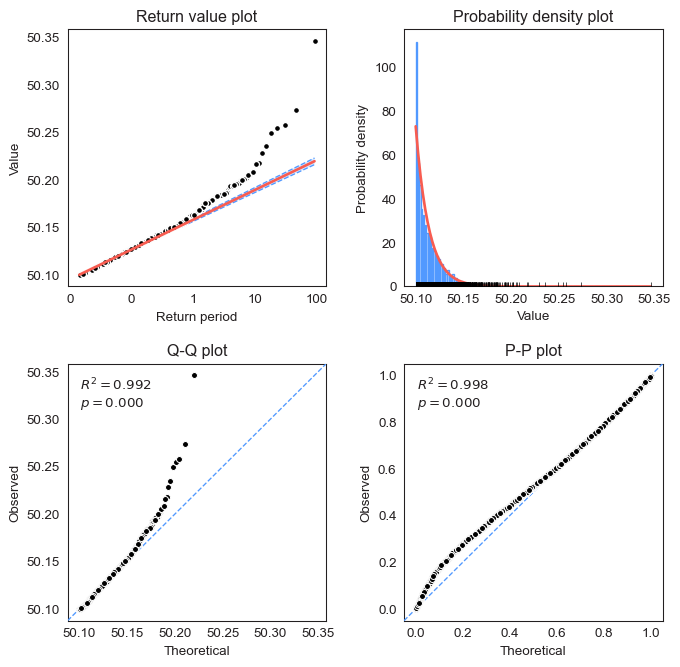

In [44]:
fig, ax = model.plot_diagnostic(alpha=0.95, return_period_size="1D")
plt.show()